# Chicago Cubs Comeback - The season that led the 2016 World Series Championship

## Business Understanding

### Background

The Chicago Cubs won the 2016 baseball World Series Championship. Prior to the 2016 baseball World Series victory, the Chicago Cubs had not won in 108 years (1908 and 1907 World Series Championship). This analysis focuses on a deep dive study on Chicago Cubs' 2016 season and the 

The dataset used in this analysis is a subset dataset from a much more comprehensive dataset.  The comprehensive dataset includes all the games and plays for <font color=blue>ALL</font> the teams in the 2016 regular season and post season. Since the Chicago Cubs won this 2016 World Series Championship and the team had not won in a long period of time, it is interesting to know what trends and patterns made this achievement possible. Therefore, the dataset presented in this analysis only focuses on the Chicago Cubs 2016 games in the regular season and post season (playoffs).

To be deleted - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

# Data Structure

## Data Meaning Type

Transaction, Record, Sequential, Graph
Discrete: 
+ Nominal, 
+ Ordinal,
+ Binary 
Continuous: Interval & Ratio
+ Interval (temp in F), 
+ Ratio (contains absolute zero)

something here

### Data Columns - Overall Game

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|Overall Game|game-id |A unique identifier assigned to each game |Nominal | these are GUIDs, so no particular range |N|
|Overall Game|startTime |The date and time the game started |Interval | These are in 2016 mainly at noon or 6 PM |N|
|Overall Game|attendance |The attedance of the game |Ratio | Approximately 30-40k with a left skew |N|
|Overall Game|dayNight |Indicate of a day or night game |Binary | D = Day, N = Night|N|
|Overall Game|duration |The overall elapsed time of the game |Ratio | Typical game is about 3 hours|N|
|Overall Game|opponent |The name of the team playing against the Cubs |Nominal | MLB Teams like: Twins, Rangers, etc.|Y|
|Overall Game|HomeAway |Indicates a Home or Away game |Binary | H = Home, A = Away |Y|
|Overall Game|VenueName |The Stadium the game was located at |Nominal | Wrigley Field, etc. |N|
|Overall Score|homeFinalRuns |The score for the home team |Ratio | 0, 1, 2... |N|
|Overall Score|awayFinalRuns |The score for the away team |Ratio | 0, 1, 2... |N|
|Overall Score|CubsFinalRuns |The score for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Score|OpponentFinalRuns |The score for the opposing team |Ratio | 0, 1, 2... |Y|
|Overall Hits|homeFinalHits |The number of hits for the home team |Ratio | 0, 1, 2... |N|
|Overall Hits|awayFinalHits |The number of hits for the away team |Ratio | 0, 1, 2... |N|
|Overall Hits|CubsFinalHits |The number of hits for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Hits|OpponentFinalHits |The number of hits for the opposing team |Ratio | 0, 1, 2... |Y|
|Overall Errors|homeFinalErrors |The number of Errors for the home team |Ratio | 0, 1, 2... |N|
|Overall Errors|awayFinalErrors |The number of Errors for the away team |Ratio | 0, 1, 2... |N|
|Overall Errors|CubsFinalErrors |The number of Errors for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Errors|OpponentFinalErrors |The number of Errors for the opposing team |Ratio | 0, 1, 2... |Y|

### Data Columns - Inning Details
Each game consists of 9 innings where each team get a turn to either field or bat. Innings are divided into the two parts by half's called TOP and BOTTOM, where during the TOP of the inning the away team hits while the home team fields. During the BOTTOM the teams switch. At the end of 9 innings whoever has the most "Runs" wins. In the event of a tie, the game continues with additional innings until there is a winner.

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|Inning Details|InningNumber |A sequential number for each inning. |Ordinal | Typically 1-9, overtime > 9 |N|
|Inning Details|homeFinalRunsForInning |The total number of runs scored for the home team during the inning |Ratio | 0, 1, 2... |N|
|Inning Details|awayFinalRunsForInning |The total number of runs scored for the away team during the inning |Ratio | 0, 1, 2... |N|
|Inning Details|CubsFinalRunsForInning |The total number of runs scored for the Cubs during the inning |Ratio | 0, 1, 2... |Y|
|Inning Details|OpponentFinalRunsForInning |The total number of runs scored for the opposing team during the inning |Ratio | 0, 1, 2... |Y|
|Inning Half|inningHalf |Indicates the top or bottom of an inning, and thus which team is at bat. Top goes before the bottom. |Ordinal | TOP = Top, BOT = Bottom |N|
|Inning Half|inningEventType |Indicates an AT_BAT or LINEUP event has occured. (See additional notes below)|Nominal | AT_BAT, LINEUP |N|
|Inning Half|inningHalfEventSequenceNumber |A sequential number for each "Inning Event" within a half. This typically increments when a new batter comes up, however it can also be incremented when the pitcher is changed. |Ordinal | 0, 1, 2... |N|

*Notes on inningEventType:  the recorded baseball stats are either AT_BAT or LINEUP. An overwhelming majority of the data is AT_BAT and describes the outcomes of the batting scenario. LINEUP values are used to indicate a change to the pitcher or other player in the game. We expect to do analysis mainly on AT_BAT data and will most likely ignore/filter out LINEUP details. 

### Data Columns - At Bat Event: State, Pitcher and Hitter
When a player is up to bat (defined when inningEventType =  AT_BAT), the pitcher will pitch the ball and the batter will decide to swing or not. For each pitch there are measures for the type of pitch, it's speed and where it was located. The outcomes of the "at bat" event capture whether the batter decided to swing at the ball or not, if they hit it where it went and the overall outcome of the event to the score. The main measures being tracked for each player are the ball and strike counts. If a batter recieives 4 balls, then they automatically get to walk to first base. If a batter receives 3 strikes they are out, and the next batter is up (note: the inningHalfEventSequenceNumber will be then be incremented).

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|At Bat Detail|atBatEventSequenceNumber |A sequential number for each event within the "at bat" event. |Ordinal | 0, 1, 2... |N|
|At Bat Detail|atBatEventType |Most events during "at bat" are a pitch, however there are sometimes steals that occur even if the pitcher hasn't thrown a ball.  |Nominal | PITCH, STEAL and "blank" (see notes below) |N|
|At Bat Detail|status|Normal events are marked "official", but a coach can ask for a review of a play and the event will either be "overturned" or "upheld". |Nominal | official, overturned, upheld and "blank" (see notes below) |N|
|At Bat Pitcher|pitcherFirstName|This is the first name of the pitcher for the at bat event. |Nominal | Adam, Jonathan, Steven|N|
|At Bat Pitcher|pitcherLastName|This is the last name of the pitcher for the at bat event. |Nominal | Smith, Thornburg, Torres|N|
|At Bat Pitcher|pitcherThrowHand|This is the dominate hand the pitcher typically uses. |Binomial | L or R |N|
|At Bat Pitcher|pitcherPitchCount|This is the cumulative number of pitches the pitcher has thrown within this game. This approximately measures the exhaustion level of the pitcher. |Ratio | 0, 1, 2... |N|
|At Bat Hitter|hitterFirstName|This is the first name of the hitter for the at bat event. |Nominal |  Adam, Jonathan, Steven|N|
|At Bat Hitter|hitterLastName|This is the last name of the hitter for the at bat event. |Nominal | Smith, Thornburg, Torres|N|
|At Bat Hitter|hitterWeight|This is the weight in pounds of the hitter. |Ratio | typical values are 180-240 |N|
|At Bat Hitter|hitterHeight|This is the height in inches of the hitter. |Ratio | typical values are 70-77 |N|
|At Bat Hitter|hitterBatHand|This is the dominate hand the batter typically uses to hit with. This is not the actual hand that the hit was performed with as there are "B" values which say this hitter could be hitting with either hand.  |Nominal | R = right, L = left & B = switch |N|

### Data Columns - At Bat Event: Pitch, Hit and Outcome
|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|At Bat Pitch|pitchTypeDescription|This is a type of pitch thrown, and describes the approximate motion of the ball. |Nominal | Fastball, Slider, Sinker...|N|
|At Bat Pitch|pitchSpeed|This is the speed of the pitch measured in MPH. |Ratio | typically in the 70-100 MPH range|N|
|At Bat Pitch|pitchZone|This is the location the ball was when it crossed the home plate. |Nominal | values are 0-13, but are really categorical as zones on a map|N|
|At Bat Hit|hitType|If the hitter actually hit the ball this is a description what type of travel the ball had, such as a fly ball, pop-up, line drive or ground ball.  |Nominal | FB, GB, LD & PU are decoded in the description|N|
|At Bat Hit|hitLocation|If the hitter actually hit, this is the location the ball landed on the field. |Nominal | values are 0-35, but are really categorical as zones on a map|N|
|At Bat Outcome|outcomeDescription|This is a description of what outcome occured as a result of the pitch and the batter's decision to try and hit the ball or not. |Nominal | Ball, Strike Looking, Strike Swinging, Foul Ball, Single, Fly Out...|N|
|At Bat Outcome|startingBalls|Measures the number of pitches that were balls at the beginning of the at bat event. |Ratio | 0, 1, 2, 3 |N|
|At Bat Outcome|Balls|Measures the number of pitches that were balls at the end of the at bat event. |Ratio | 0, 1, 2, 3, 4 |N|
|At Bat Outcome|startingStrikes|Measures the number of pitches that were strikes at the beginning of the at bat event. |Ratio | 0, 1, 2 |N|
|At Bat Outcome|Strikes|Measures the number of pitches that were strikes at the end of the at bat event. |Ratio | 0, 1, 2, 3 |N|
|At Bat Outcome|startingOuts|Measures the number of outs accumulated in the inning half at the beginning of the at bat event. |Ratio | 0, 1, 2 |N|
|At Bat Outcome|Outs|Measures the number of outs accumulated in the inning half at the end of the at bat event. |Ratio | 0, 1, 2 |N|





*Blanks occur during "lineup" inning events (see inningEventType notes).

New stuff

In [8]:
# Importing relevant libraries to mine the Chicago Cubs 2016 Season

import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Quality

### Importing datasets and data consolidation

In [9]:
#Step 1: Importing Chicago Cubs' 'Away' games data

cubs_away_url='https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/cubs_away_reg.csv'
cubs_away_reg_df = pd.read_csv(cubs_away_url)

#Step 2: Importing Chicago Cubs' 'Home' games data

cubs_home_url = 'https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/cubs_home_reg.csv'
cubs_home_reg_df = pd.read_csv(cubs_home_url)

#Step 3: Importing Chicago Cubs' post season data

cubs_post_season_url='https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/post_season_cubs2.csv'
post_season_cubs_df = pd.read_csv(cubs_post_season_url)

#Step 4 This line of code combines all three datasets: cubs_away_reg_df,cubs_home_reg_df and post_season_cubs_df. This way we can create statistics from a combined dataset
cubs_reg_post_df = pd.concat([cubs_away_reg_df,cubs_home_reg_df, post_season_cubs_df], axis = 0)

In [10]:
cubs_reg_post_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54877 entries, 0 to 3120
Columns: 145 entries, gameId to lineupOrder
dtypes: float64(1), int64(47), object(97)
memory usage: 61.1+ MB


In [11]:
# After the information is loaded, further cleanup process. The cubs_reg_post_df contains just the variables that are needed

cubs_reg_post_df = cubs_reg_post_df.drop(['seasonId','year','gameStatus','awayTeamId','homeTeamId','venueId','venueSurface','venueZip','venueMarket',
'venueOutfieldDistances','createdAt','updatedAt','pitchType','rob0_start','rob0_end','rob0_isOut','rob0_outcomeId',
'rob0_outcomeDescription','rob1_start','rob1_end','rob1_isOut','rob1_outcomeId','rob1_outcomeDescription',
'rob2_start','rob2_end','rob2_isOut','rob2_outcomeId','rob2_outcomeDescription','rob3_start','rob3_end',
'rob3_isOut','rob3_outcomeId','rob3_outcomeDescription','awayFielder1','awayFielder2','awayFielder3','awayFielder4',
'awayFielder5','awayFielder6','awayFielder7','awayFielder8','awayFielder9','awayFielder10','awayFielder11',
'awayFielder12','awayBatter1','awayBatter2','awayBatter3','awayBatter4','awayBatter5','awayBatter6','awayBatter7',
'awayBatter8','awayBatter9','homeFielder1','homeFielder2','homeFielder3','homeFielder4','homeFielder5',
'homeFielder6','homeFielder7','homeFielder8','homeFielder9','homeFielder10','homeFielder11','homeFielder12',
'homeBatter1','homeBatter2','homeBatter3','homeBatter4','homeBatter5','homeBatter6','homeBatter7','homeBatter8',
'homeBatter9','lineupTeamId','lineupPlayerId','lineupPosition','lineupOrder'], axis =1)

In [12]:
cubs_reg_post_sub_sort_df = cubs_reg_post_df.sort_values(['gameId','inningNumber','inningHalf','inningHalfEventSequenceNumber',
                                 'hitterId','atBatEventSequenceNumber', 'outcomeDescription'],ascending=[True, True, False, True
                                                                                                       , True, True, True])

In [13]:
# Remove unused rows - LINEUP
cubs_reg_post_sub_sort_df = cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['inningEventType'] != 'LINEUP'] 

# Remove unused rows - STEALS
cubs_reg_post_sub_sort_df = cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['atBatEventType'] != 'STEAL'] 


## New Features

This is where we make the Cubs specific columns

In [14]:
def home(x):
    if x == 'Cubs':
        return 'H'
    return 'A'

def opponent(h, a):
    if h != 'Cubs':
        return h
    return a

def scoreCubs(h, hf, af):
    if h == 'H':
        return hf
    elif h == 'A':
        return af
    
def scoreOppo(h, hf, af):
    if h == 'H':
        return af
    elif h == 'A':
        return hf

def hitsCubs(h, hf, af):
    if h == 'H':
        return hf
    elif h == 'A':
        return af

def hitsOppo(h, hf, af):
    if h == 'H':
        return af
    elif h == 'A':
        return hf
    
def errCubs(h, hf, af):
    if h == 'H':
        return hf
    elif h == 'A':
        return af

def errOppo(h, hf, af):
    if h == 'H':
        return af
    elif h == 'A':
        return hf

In [15]:
cubs_reg_post_sub_sort_df['HomeAway'] = cubs_reg_post_sub_sort_df['homeTeamName'].apply(home)
cubs_reg_post_sub_sort_df['Opponent'] = cubs_reg_post_sub_sort_df.apply(
                                        lambda row: opponent(row['homeTeamName'], row['awayTeamName']), axis =1)
cubs_reg_post_sub_sort_df['CubsFinalRuns']= cubs_reg_post_sub_sort_df.apply(lambda row: scoreCubs(row['HomeAway'], 
                                                                                                row['homeFinalRuns']
                                                                                                ,row['awayFinalRuns']), 
                                                                             axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalRuns']=cubs_reg_post_sub_sort_df.apply( lambda row: scoreOppo(row['HomeAway'], 
                                                                                                      row['homeFinalRuns']
                                                                                              ,row['awayFinalRuns']),
                                                                                 axis =1)
cubs_reg_post_sub_sort_df['CubsFinalHits'] = cubs_reg_post_sub_sort_df.apply( lambda row: hitsCubs(row['HomeAway'], row['homeFinalHits']
                                                                                              ,row['awayFinalHits']), axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalHits'] = cubs_reg_post_sub_sort_df.apply( lambda row: hitsOppo(row['HomeAway'], row['homeFinalHits']
                                                                                              ,row['awayFinalHits']), 
                                                                                  axis =1)
cubs_reg_post_sub_sort_df['CubsFinalErrors'] = cubs_reg_post_sub_sort_df.apply( lambda row: errCubs(row['HomeAway'], 
                                                                                                    row['homeFinalErrors']
                                                                                              ,row['awayFinalErrors']), axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalErrors'] = cubs_reg_post_sub_sort_df.apply( lambda row: errOppo(row['HomeAway'], 
                                                                                                row['homeFinalErrors']
                                                                                                ,row['awayFinalErrors']), 
                                                                                    axis =1)

In [20]:
## Final Dataset to be used below
cubs_df = cubs_reg_post_sub_sort_df

cubs_reg_post_df = cubs_reg_post_sub_sort_df
cubs_reg_post_sub_df = cubs_reg_post_sub_sort_df

## Simple Statistics

In [21]:
cubs_reg_post_df.describe()

,attendance,durationMinutes,venueCapacity,homeFinalRuns,homeFinalHits,homeFinalErrors,awayFinalRuns,awayFinalHits,awayFinalErrors,homeFinalRunsForInning,...,is_wild_pitch,is_passed_ball,homeCurrentTotalRuns,awayCurrentTotalRuns,CubsFinalRuns,OpponentFinalRuns,CubsFinalHits,OpponentFinalHits,CubsFinalErrors,OpponentFinalErrors
count,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,...,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000
mean,37983.162678,190.453372,42179.531834,4.408639,7.938490,0.647155,4.257917,8.108322,0.604988,0.602461,...,0.003091,0.000505,2.123000,2.121017,5.131573,3.534983,8.873831,7.172982,0.664146,0.587997
std,6773.974140,33.571362,3579.346373,2.992514,3.364894,0.833602,3.153237,3.524623,0.805744,1.104847,...,0.055512,0.022477,2.511441,2.490144,3.078933,2.855696,3.486626,3.186984,0.894268,0.736471
min,16497.000000,75.000000,36742.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,34508.000000,170.000000,41072.000000,2.000000,6.000000,0.000000,2.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,7.000000,5.000000,0.000000,0.000000
50%,40791.000000,184.000000,41072.000000,4.000000,8.000000,0.000000,4.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,9.000000,7.000000,0.000000,0.000000
75%,41507.000000,200.000000,42302.000000,6.000000,10.000000,1.000000,6.000000,10.000000,1.000000,1.000000,...,0.000000,0.000000,3.000000,3.000000,7.000000,5.000000,11.000000,9.000000,1.000000,1.000000
max,54449.000000,303.000000,56000.000000,14.000000,22.000000,4.000000,16.000000,18.000000,4.000000,7.000000,...,1.000000,1.000000,14.000000,16.000000,16.000000,14.000000,18.000000,22.000000,4.000000,4.000000


In [22]:
cubs_reg_post_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51439 entries, 7364 to 1339
Data columns (total 74 columns):
gameId                           51439 non-null object
seasonType                       51439 non-null object
startTime                        51439 non-null object
attendance                       51439 non-null int64
dayNight                         51439 non-null object
duration                         51439 non-null object
durationMinutes                  51439 non-null int64
awayTeamName                     51439 non-null object
homeTeamName                     51439 non-null object
venueName                        51439 non-null object
venueCapacity                    51439 non-null int64
venueCity                        51439 non-null object
venueState                       51439 non-null object
homeFinalRuns                    51439 non-null int64
homeFinalHits                    51439 non-null int64
homeFinalErrors                  51439 non-null int64
awayFinalRuns  

In [23]:
cubs_reg_post_sub_df.describe()

,attendance,durationMinutes,venueCapacity,homeFinalRuns,homeFinalHits,homeFinalErrors,awayFinalRuns,awayFinalHits,awayFinalErrors,homeFinalRunsForInning,...,is_wild_pitch,is_passed_ball,homeCurrentTotalRuns,awayCurrentTotalRuns,CubsFinalRuns,OpponentFinalRuns,CubsFinalHits,OpponentFinalHits,CubsFinalErrors,OpponentFinalErrors
count,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,...,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000,51439.000000
mean,37983.162678,190.453372,42179.531834,4.408639,7.938490,0.647155,4.257917,8.108322,0.604988,0.602461,...,0.003091,0.000505,2.123000,2.121017,5.131573,3.534983,8.873831,7.172982,0.664146,0.587997
std,6773.974140,33.571362,3579.346373,2.992514,3.364894,0.833602,3.153237,3.524623,0.805744,1.104847,...,0.055512,0.022477,2.511441,2.490144,3.078933,2.855696,3.486626,3.186984,0.894268,0.736471
min,16497.000000,75.000000,36742.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,34508.000000,170.000000,41072.000000,2.000000,6.000000,0.000000,2.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,7.000000,5.000000,0.000000,0.000000
50%,40791.000000,184.000000,41072.000000,4.000000,8.000000,0.000000,4.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,9.000000,7.000000,0.000000,0.000000
75%,41507.000000,200.000000,42302.000000,6.000000,10.000000,1.000000,6.000000,10.000000,1.000000,1.000000,...,0.000000,0.000000,3.000000,3.000000,7.000000,5.000000,11.000000,9.000000,1.000000,1.000000
max,54449.000000,303.000000,56000.000000,14.000000,22.000000,4.000000,16.000000,18.000000,4.000000,7.000000,...,1.000000,1.000000,14.000000,16.000000,16.000000,14.000000,18.000000,22.000000,4.000000,4.000000


In [24]:
cubs_reg_post_sub_df.head()

,gameId,seasonType,startTime,attendance,dayNight,duration,durationMinutes,awayTeamName,homeTeamName,venueName,...,homeCurrentTotalRuns,awayCurrentTotalRuns,HomeAway,Opponent,CubsFinalRuns,OpponentFinalRuns,CubsFinalHits,OpponentFinalHits,CubsFinalErrors,OpponentFinalErrors
7364,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
2689,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
7407,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7883,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
2697,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0


In [25]:
cubs_reg_post_sub_sort_df = cubs_reg_post_sub_df.sort_values(['gameId','inningNumber','inningHalf','inningHalfEventSequenceNumber',
                                 'hitterId','atBatEventSequenceNumber', 'outcomeDescription'],ascending=[True, True, False, True
                                                                                                       , True, True, True])

In [26]:
cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['gameId'] == '0024139e-3dde-481b-92f5-a29af99d5ea3']

,gameId,seasonType,startTime,attendance,dayNight,duration,durationMinutes,awayTeamName,homeTeamName,venueName,...,homeCurrentTotalRuns,awayCurrentTotalRuns,HomeAway,Opponent,CubsFinalRuns,OpponentFinalRuns,CubsFinalHits,OpponentFinalHits,CubsFinalErrors,OpponentFinalErrors
7364,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
2689,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
7407,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7883,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
2697,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7371,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
2255,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
2278,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7845,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7884,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0


In [27]:
cubs_reg_post_sub_sort_df[['gameId','inningNumber','inningHalf','inningHalfEventSequenceNumber',
                                 'hitterId','atBatEventSequenceNumber', 'outcomeDescription']].head(292)

,gameId,inningNumber,inningHalf,inningHalfEventSequenceNumber,hitterId,atBatEventSequenceNumber,outcomeDescription
7364,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,1,f7e89c0d-5a15-4085-9a46-18aaaa5955da,1,Ball
2689,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,1,f7e89c0d-5a15-4085-9a46-18aaaa5955da,2,Foul Ball
7407,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,1,f7e89c0d-5a15-4085-9a46-18aaaa5955da,3,Homerun
7883,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,2,0e762dec-639f-497f-a65b-af0eaa8be39f,1,Fly Out
2697,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,1,Foul Ball
7371,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,2,Ball
2255,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,3,Ball
2278,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,4,Strike Swinging
7845,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,5,Foul Ball
7884,0024139e-3dde-481b-92f5-a29af99d5ea3,1,TOP,3,53a80099-966e-451c-a1e2-dccbb16f8dd8,6,Ball


In [28]:
cubs_reg_post_sub_sort_df['OpponentFinalErrors'].value_counts()

0    27910
1    17480
2     5715
4      334
Name: OpponentFinalErrors, dtype: int64

In [29]:
#cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['homeTeamName'] == 'Cubs'].count()

In [30]:
#cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['homeTeamName'] != 'Cubs'].count()

In [31]:
cubs_reg_post_sub_sort_df['HomeAway'].value_counts()

A    26000
H    25439
Name: HomeAway, dtype: int64

In [32]:
#cubs_reg_post_sub_sort_df.drop(['Home'],axis=1, inplace = True)

In [33]:
cubs_reg_post_sub_sort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51439 entries, 7364 to 1339
Data columns (total 74 columns):
gameId                           51439 non-null object
seasonType                       51439 non-null object
startTime                        51439 non-null object
attendance                       51439 non-null int64
dayNight                         51439 non-null object
duration                         51439 non-null object
durationMinutes                  51439 non-null int64
awayTeamName                     51439 non-null object
homeTeamName                     51439 non-null object
venueName                        51439 non-null object
venueCapacity                    51439 non-null int64
venueCity                        51439 non-null object
venueState                       51439 non-null object
homeFinalRuns                    51439 non-null int64
homeFinalHits                    51439 non-null int64
homeFinalErrors                  51439 non-null int64
awayFinalRuns  

In [34]:
cubs_reg_post_sub_sort_df.head()

,gameId,seasonType,startTime,attendance,dayNight,duration,durationMinutes,awayTeamName,homeTeamName,venueName,...,homeCurrentTotalRuns,awayCurrentTotalRuns,HomeAway,Opponent,CubsFinalRuns,OpponentFinalRuns,CubsFinalHits,OpponentFinalHits,CubsFinalErrors,OpponentFinalErrors
7364,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
2689,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,0,H,Pirates,4,3,6,8,0,0
7407,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
7883,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0
2697,0024139e-3dde-481b-92f5-a29af99d5ea3,REG,2016-06-19 00:15:00 UTC,41424,N,3:00,180,Pirates,Cubs,Wrigley Field,...,0,1,H,Pirates,4,3,6,8,0,0


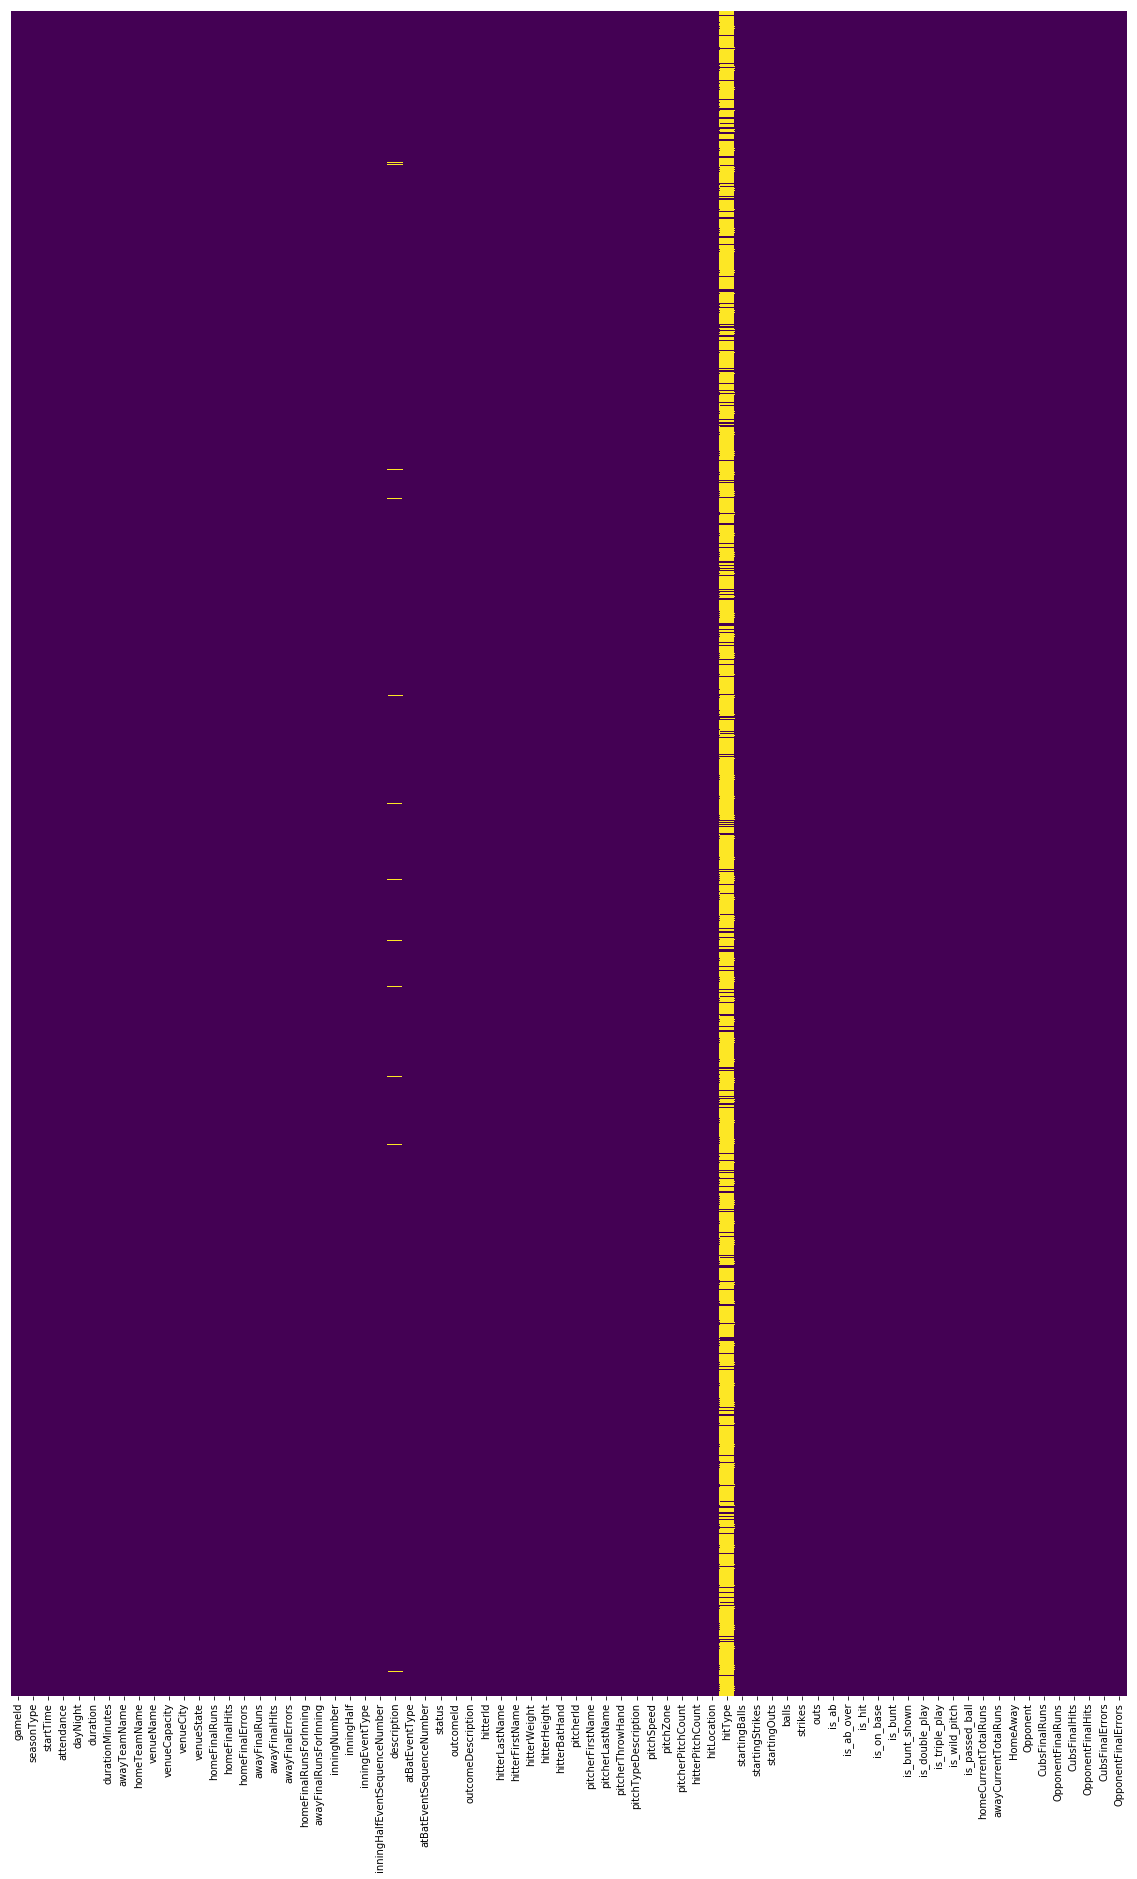

In [35]:
plt.figure(figsize=(20, 31))
sns.heatmap(cubs_reg_post_sub_sort_df.isnull(), yticklabels=False, cbar = False,  cmap ='viridis')

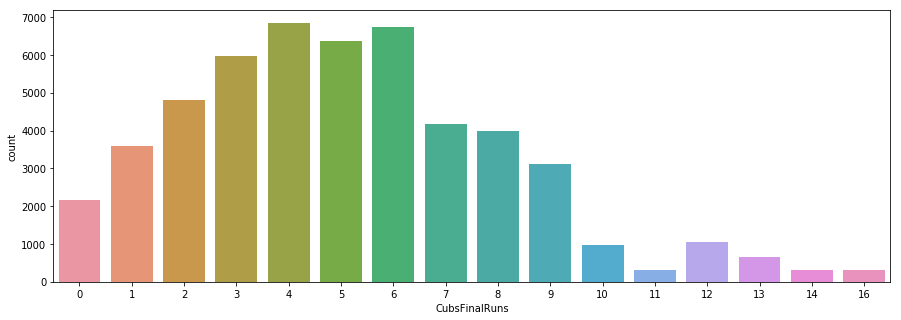

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_reg_post_sub_sort_df['CubsFinalRuns'])

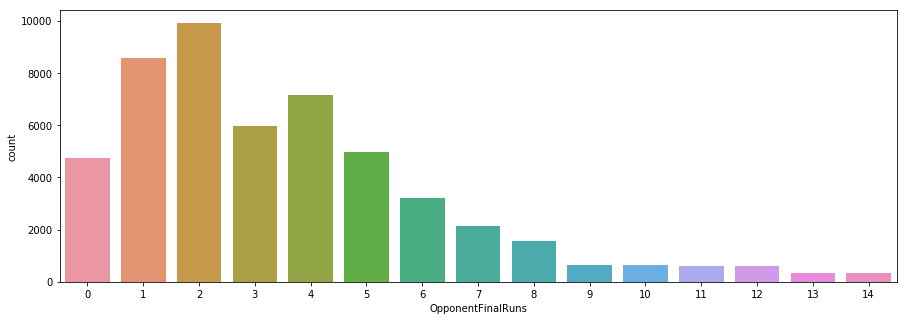

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_reg_post_sub_sort_df['OpponentFinalRuns'])

In [38]:
cubs_reg_post_sub_sort_df[['HomeAway','homeTeamName','awayTeamName','Opponent','homeFinalRuns','awayFinalRuns'
                          ,'CubsFinalRuns','OpponentFinalRuns','homeFinalHits','awayFinalHits','CubsFinalHits'
                          ,'OpponentFinalHits','homeFinalErrors','awayFinalErrors','CubsFinalErrors','OpponentFinalErrors']].head(20000)

,HomeAway,homeTeamName,awayTeamName,Opponent,homeFinalRuns,awayFinalRuns,CubsFinalRuns,OpponentFinalRuns,homeFinalHits,awayFinalHits,CubsFinalHits,OpponentFinalHits,homeFinalErrors,awayFinalErrors,CubsFinalErrors,OpponentFinalErrors
7364,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
2689,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
7407,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
7883,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
2697,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
7371,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
2255,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
2278,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
7845,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0
7884,H,Cubs,Pirates,Pirates,4,3,4,3,6,8,6,8,0,0,0,0


In [39]:

cubs_df = cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['inningEventType'] != 'LINEUP'] #.count()

In [40]:
cubs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51439 entries, 7364 to 1339
Data columns (total 74 columns):
gameId                           51439 non-null object
seasonType                       51439 non-null object
startTime                        51439 non-null object
attendance                       51439 non-null int64
dayNight                         51439 non-null object
duration                         51439 non-null object
durationMinutes                  51439 non-null int64
awayTeamName                     51439 non-null object
homeTeamName                     51439 non-null object
venueName                        51439 non-null object
venueCapacity                    51439 non-null int64
venueCity                        51439 non-null object
venueState                       51439 non-null object
homeFinalRuns                    51439 non-null int64
homeFinalHits                    51439 non-null int64
homeFinalErrors                  51439 non-null int64
awayFinalRuns  

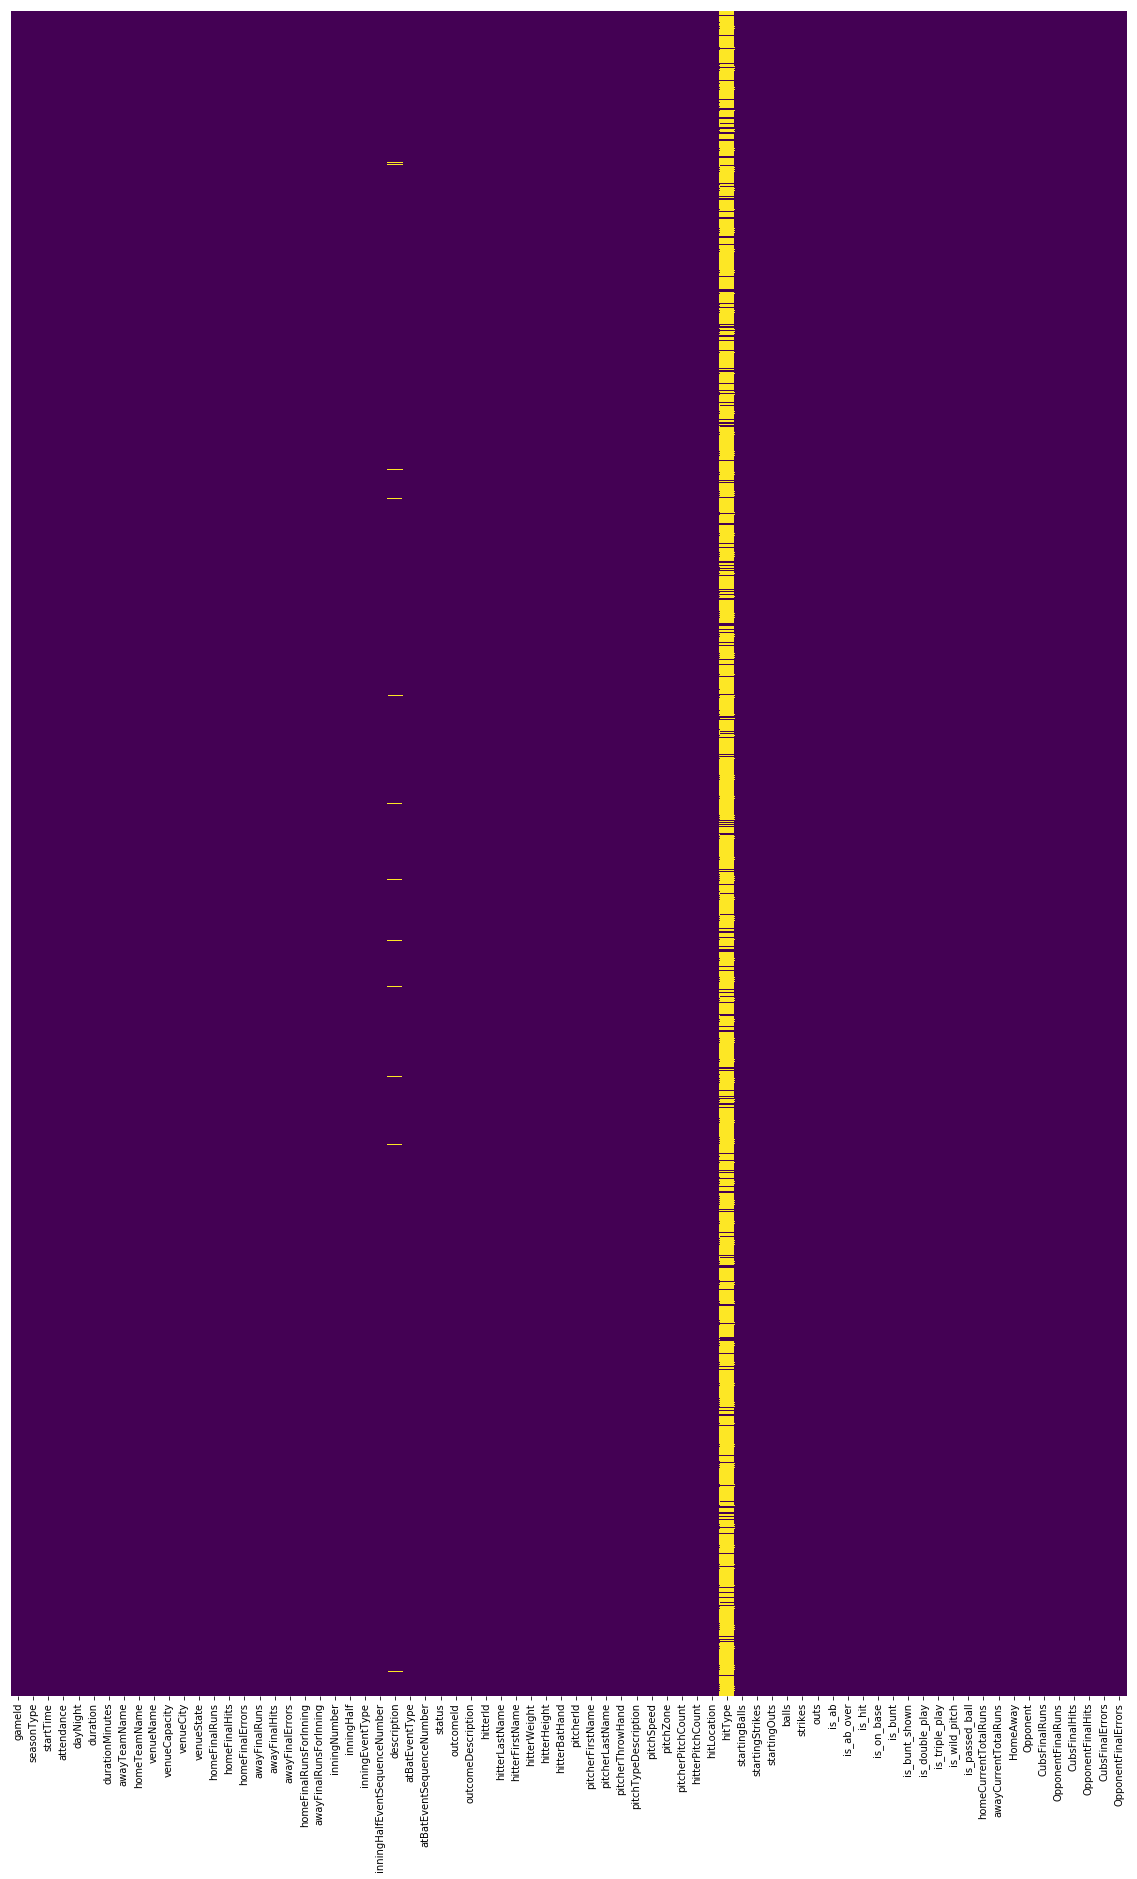

In [41]:
plt.figure(figsize=(20, 31))
sns.heatmap(cubs_df.isnull(), yticklabels=False, cbar = False,  cmap ='viridis')

In [42]:
cubs_df['hitType'].value_counts()

GB    3230
LD    1644
FB    1566
PU     599
Name: hitType, dtype: int64

In [43]:
cubs_df['pitchTypeDescription'].value_counts()

Fastball            23725
Slider               7161
Sinker               5843
Curveball            5843
Changeup             5143
Cutter               3150
Splitter              272
Intentional Ball      225
Other                  67
Pitchout               10
Name: pitchTypeDescription, dtype: int64

In [44]:
#cubs_df['description'].value_counts()

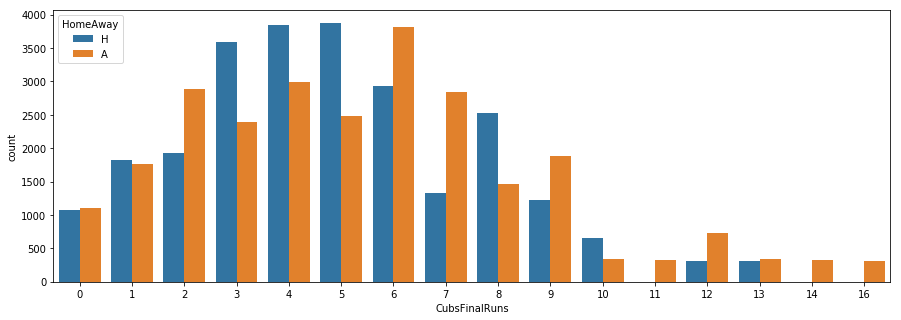

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_df['CubsFinalRuns'], hue = cubs_df['HomeAway'])

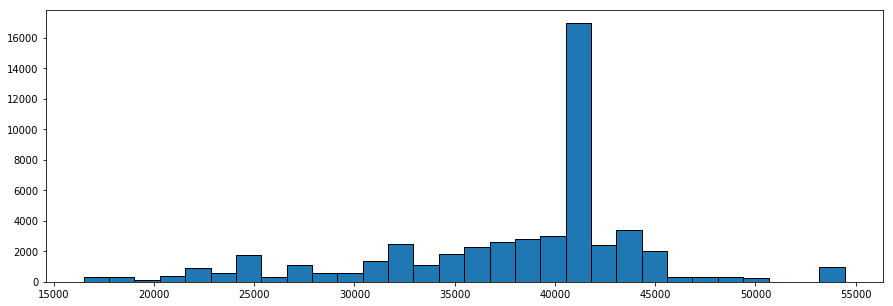

In [54]:
plt.figure(figsize=(15,5))
#plt.histplot(x=cubs_df['attendance'], hue = cubs_df['HomeAway'])
plt.hist(cubs_df['attendance'],bins = 30, ec='black')
plt.show()

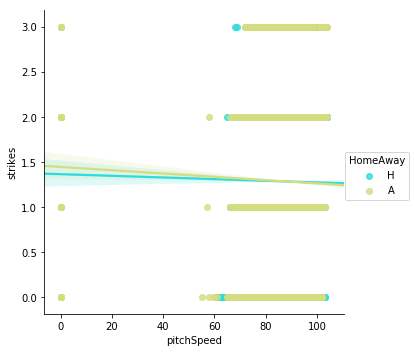

In [47]:
plt.figure(figsize=(15,5))
sns.lmplot(data =cubs_df , x = 'pitchSpeed', y = 'strikes', hue = 'HomeAway', palette= 'rainbow')

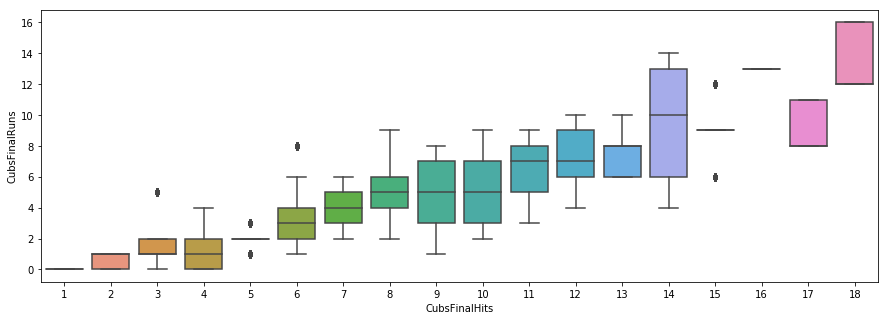

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(data =cubs_df , y = 'CubsFinalRuns', x = 'CubsFinalHits')

## Data Quality

To be deleted - Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

## Simple Statistics

To be deleted - Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

## Visualize Attributes

To be deleted - Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

## Explore Joint Attributes

To be deleted - Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

## Explore Attributes and Class

To be deleted - Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

## Exceptional Work

To be deleted - You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.